# EXPLORE Data Science Academy Classification Hackathon

© Explore Data Science Academy

---
### Honour Code

I {**Caleb, Tanko**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Hackathon Overview: South African Language Identification

<!-- South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government



With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.  -->

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section all the libraries that will be used throughout your analysis and modelling is imported. |

---

In [65]:
# Libraries for data loading, data manipulation and data visulisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# utilities
import numpy as np
import pandas as pd
import re

# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer

# sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section the provide data is loaded from Kaggle into a DataFrame. |

---

In [66]:
#Loaded train_set data into df_train DataFrame
df_train = pd.read_csv('train_set.csv')

In [67]:
#Loaded the test_set data into df_test DataFrame
df_test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, an in-depth analysis of all the variables in the DataFrame is carried out by Exploratory Data Analysis. |

---


### Examine the Dataframe by calling the head() function

In [68]:
# calling the head function to display the FIVE top records of the data
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


##### from the above cell, we can conclude that;
* lang_id - Target Feature
* text - Independent Feature

In [69]:
# caling the head function to display the Five top records of the data
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


##### from the test dataset, we have two columns
* index
* text


#### Check for Null values

In [70]:
# check if there are null values in the data
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [71]:
# check if there are null values in the test data provided
df_test.isnull().sum()

index    0
text     0
dtype: int64

#### From the above cells, no null values was found in our the dataset given

In [72]:
# check for unique Target features
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

##### From the above, we have the following lang_id and their respective languages
#### Language IDs
* afr - Afrikaans
* eng - English
* nbl - isiNdebele
* nso - Sepedi
* sot - Sesotho
* ssw - siSwati
* tsn - Setswana
* tso - Xitsonga
* ven - Tshivenda
* xho - isiXhosa
* zul - isiZulu

In [73]:
# Length of the train dataset
print('length of data is', len(df_train))

length of data is 33000


In [74]:
# Length of the test dataset
print('length of data is', len(df_test))

length of data is 5682


In [75]:
# Data Information

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [76]:
# Data types of all columns

df_train.dtypes

lang_id    object
text       object
dtype: object

#### Getting the counts of each languages represented in the dataset provided

In [77]:
# calling the value_counts() method to get the number of samples in each sentiment

df_train['lang_id'].value_counts()

nbl    3000
nso    3000
tso    3000
eng    3000
zul    3000
afr    3000
ssw    3000
tsn    3000
sot    3000
xho    3000
ven    3000
Name: lang_id, dtype: int64

*from the above cell, each language has 3000 data samples*

#### Visualizing the distribution of languages in the dataset

<function matplotlib.pyplot.show(close=None, block=None)>

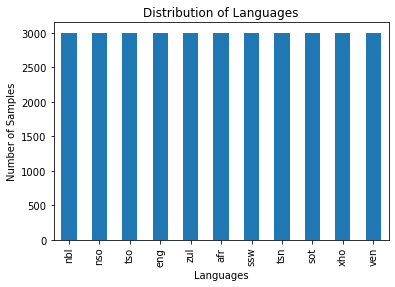

In [78]:
# Calling the plot method on the train dataframe
df_train['lang_id'].value_counts().plot(kind = 'bar', title= 'Distribution of Languages', xlabel='Languages', ylabel='Number of Samples')
plt.show # to display the visual

<AxesSubplot:xlabel='lang_id', ylabel='count'>

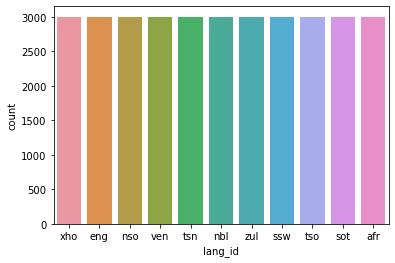

In [79]:
# using the seaborn library to create a countplot to display the distribution languages in the dataset
sns.countplot(x='lang_id', data=df_train)

##### From the above graph, we can see that the language samples are evenly distributed in the dataset

### Summary from EDA
    1. The sample data of all the languages represnted in the dataset are evenly distributed.
    
    2. There are 11 languages represented in the dataset provided.
    
    3. A total of 33000 data samples were provided in the train dataset.
    
    4. Null values are absent in the provided dataset.

<a id="four"></a>
## 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data Preprocessing ⚡ |
| :--------------------------- |
| In this section the data would be sujected to different text preprocessing approach to aid better perfomance on our model. |

---

In [80]:
# Select the text and lang_id column for our further analysis
train_data = df_train[['text','lang_id']]

# select the text column in our test data
test_data = df_test['text']

#### Converting all text data into lower case characters

In [81]:
# Converting the text column of the train data to lower case characters
train_data['text'] = train_data['text'].str.lower()
train_data['text'].head()
train_data.head()

,text,lang_id
0,umgaqo-siseko wenza amalungiselelo kumaziko ax...,xho
1,i-dha iya kuba nobulumko bokubeka umsebenzi na...,xho
2,the province of kwazulu-natal department of tr...,eng
3,o netefatša gore o ba file dilo ka moka tše le...,nso
4,khomishini ya ndinganyiso ya mbeu yo ewa maana...,ven


In [82]:
# Converting the text column of the test data to lower case characters
test_data = test_data.str.lower()
test_data.head()


0    mmasepala, fa maemo a a kgethegileng a letlele...
1    uzakwaziswa ngokufaneleko nakungafuneka eminye...
2           tshivhumbeo tshi fana na ngano dza vhathu.
3    kube inja nelikati betingevakala kutsi titsini...
4                        winste op buitelandse valuta.
Name: text, dtype: object

#### Removing Punctuations from Text Data

In [83]:
# Using the string library to import all available punctuations and declaring a variable to store all the punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations

In [84]:
# a function that removes punctuations for a given text
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [85]:
#  Used a lambda function to apply the above  function to the text column in our train data
train_data['text']= train_data['text'].apply(lambda x: cleaning_punctuations(x))
train_data['text'].tail()

32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, dtype: object

In [86]:
#  Used a lambda function to apply the above  function to the text column in our test data
test_data = test_data.apply(lambda x: cleaning_punctuations(x))
test_data.tail()

5677                      you mark your ballot in private
5678    ge o ka kgetha ka bowena go se šomiše mofani k...
5679    e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680    tb ke bokudi ba pmb mme morero o tla lefella t...
5681                  vakatjhela iwebhusayidi yethu kuwww
Name: text, dtype: object

#### Removing Stop Words from Text Data

In [87]:
# # defining the variable to store all stopwords
# stopwords_list = stopwords.words('english')

In [88]:
# STOPWORDS = set(stopwords_list)

# # developed a function that removes stopwords from a text
# def cleaning_stopwords(message):
#     '''this function takes a in a message as input,
#         uses list comprehension to generate a list 
#         of words in input without stopwords, 
#         the it is later joined together
#     '''
#     return " ".join([word for word in str(message).split() if word not in STOPWORDS])

In [89]:
# # Using lambda function to apply the above function to the message column in our train data
# train_data['text'] = train_data['text'].apply(lambda message: cleaning_stopwords(message))
# train_data['text'].head()

In [90]:
# test_data = test_data.apply(lambda message: cleaning_stopwords(message))
# test_data.head()

In [91]:
# a function that removes repeating characters in a given text
def cleaning_redundant_char(text):
    cleaned = re.sub(r'(.)1+', r'1', text)
    return cleaned

In [92]:
#  Used a lambda function to apply the above  function to the text column in our train data

train_data['text'] = train_data['text'].apply(lambda x: cleaning_redundant_char(x))
train_data['text'].tail()

32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, dtype: object

In [93]:
#  Used a lambda function to apply the above  function to the text column in our test data
test_data = test_data.apply(lambda x: cleaning_redundant_char(x))
test_data.tail()

5677                      you mark your ballot in private
5678    ge o ka kgetha ka bowena go se šomiše mofani k...
5679    e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680    tb ke bokudi ba pmb mme morero o tla lefella t...
5681                  vakatjhela iwebhusayidi yethu kuwww
Name: text, dtype: object

#### Removing URLs from Text Data

In [94]:
# a function that removes all URLs in a given text

def removing_URLs(data):
    cleaned = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
    return cleaned

In [95]:
#  Used a lambda function to apply the above  function to the text column in our train data

train_data['text'] = train_data['text'].apply(lambda x: removing_URLs(x))
train_data['text'].head()

0    umgaqosiseko wenza amalungiselelo kumaziko axh...
1    idha iya kuba nobulumko bokubeka umsebenzi nap...
2    the province of kwazulunatal department of tra...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

In [96]:
#  Used a lambda function to apply the above  function to the text column in our test_data

test_data = test_data.apply(lambda x: removing_URLs(x))
test_data.tail()

5677                      you mark your ballot in private
5678    ge o ka kgetha ka bowena go se šomiše mofani k...
5679    e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680    tb ke bokudi ba pmb mme morero o tla lefella t...
5681                  vakatjhela iwebhusayidi yethu kuwww
Name: text, dtype: object

#### Remove Numbers from Text Data

In [97]:
# a Function that removes numbers from a given text of data
def removing_numbers(data):
    cleaned = re.sub('[0-9]+', '', data)
    return cleaned

In [98]:
#  Used a lambda function to apply the above  function to the text column in our train data

train_data['text'] = train_data['text'].apply(lambda x: removing_numbers(x))
train_data['text'].head()

0    umgaqosiseko wenza amalungiselelo kumaziko axh...
1    idha iya kuba nobulumko bokubeka umsebenzi nap...
2    the province of kwazulunatal department of tra...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

In [99]:
#  Used a lambda function to apply the above  function to the text column in our test_data

test_data = test_data.apply(lambda x: removing_numbers(x))
test_data.tail()

5677                      you mark your ballot in private
5678    ge o ka kgetha ka bowena go se šomiše mofani k...
5679    e ka kopo etsa kgetho ya hao ka hloko hobane h...
5680    tb ke bokudi ba pmb mme morero o tla lefella t...
5681                  vakatjhela iwebhusayidi yethu kuwww
Name: text, dtype: object

#### Tokenization of Data

In [100]:
# Tokenization of the tweet message column of our train data
tokeniser = TreebankWordTokenizer()
train_data['text'] = train_data['text'].apply(tokeniser.tokenize)
train_data['text'].head()

0    [umgaqosiseko, wenza, amalungiselelo, kumaziko...
1    [idha, iya, kuba, nobulumko, bokubeka, umseben...
2    [the, province, of, kwazulunatal, department, ...
3    [o, netefatša, gore, o, ba, file, dilo, ka, mo...
4    [khomishini, ya, ndinganyiso, ya, mbeu, yo, ew...
Name: text, dtype: object

In [101]:
# Tokenization of the tweet message column of our test data
tokeniser = TreebankWordTokenizer()
test_data = test_data.apply(tokeniser.tokenize)
test_data.head()

0    [mmasepala, fa, maemo, a, a, kgethegileng, a, ...
1    [uzakwaziswa, ngokufaneleko, nakungafuneka, em...
2    [tshivhumbeo, tshi, fana, na, ngano, dza, vhathu]
3    [kube, inja, nelikati, betingevakala, kutsi, t...
4                    [winste, op, buitelandse, valuta]
Name: text, dtype: object

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, different models were trained, Evaluated and used to predict classes of our test data |

---

In [102]:
# Seperate the train data into X and y
X = train_data.text
y = train_data.lang_id

In [103]:
# Using the train_test_split model of sklearn to split our data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [104]:
# Instantiating the TF-IDF vectorizer object to a variable tt
tt = TfidfVectorizer(preprocessor=list, tokenizer=list, ngram_range=(1,2),min_df=2, strip_accents = 'ascii', smooth_idf=False)

# A function that vectorise a given text of data input
def vectorise(X_train, X_test, test_data):
    '''
    This function takes in three input, two from our train data and one from the test data,
    fits and transforms the data.
    The function returns an output of the vectorised inputs
    '''
    tt.fit(X_train)
    X_train = tt.transform(X_train)
    X_test = tt.transform(X_test)
    test_data = tt.transform(test_data)
    
    return X_train, X_test, test_data

In [105]:
# Apply the vectorise funtion on X_train, X_test, test_data
X_train, X_test, test_data = vectorise(X_train, X_test, test_data)

In [106]:
# a funtion that evaluates the model based on classifcation report of SKlearn

def model_Evaluate(model):
    '''
    This functions the input of a model name, 
    get the predictions for X_test,
    and evaluates the perfomance of the model with the classification report
    '''
    y_pred = model.predict(X_test) # get predict values for Test dataset

    return print(classification_report(y_test, y_pred)) # Print the evaluation metrics for the dataset.
    

### First Model - Bernoulli Naive Bayes?  

Bernoulli Naive Bayes. BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable.

In [121]:
# instantiating the model, training the model, calling the evaluation functon on the model and getting predictions from the model
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train) 
model_Evaluate(BNBmodel) 
y_pred1 = BNBmodel.predict(test_data) 

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      0.98      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      0.99      1.00       609
         zul       0.96      1.00      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Second Model - LinearSVC

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

In [126]:
# instantiating the model, training the model, calling the evaluation functon on the model and getting predictions from the model
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(test_data)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Third Model - Multinomial Naive Bayes

The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

In [123]:
# instantiating the model, training the model, calling the evaluation functon on the model and getting predictions from the model

from sklearn.naive_bayes import MultinomialNB
M_NB = MultinomialNB()
M_NB.fit(X_train, y_train)
model_Evaluate(M_NB)
y_pred3= M_NB.predict(test_data)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



##### Note: After submitting the predictions from the base models, the third model (Multinomial Naive Bayes) out performed others with a score of 0.95124

##### However, with hyper parameter tuning, we should achieve a better result

### Hyper Parameter Tuning with GridSearchCv

##### This would help us to identify best performing parameters for the model

In [56]:
from sklearn.model_selection import GridSearchCV # Importing the needed library
 
# defining parameter range
param_grid = {'alpha' : [0.1, 1.0, 10.0], 'fit_prior': [True, False]}
 
# instantiating the object
grid = GridSearchCV(MultinomialNB(), param_grid, refit = True, verbose = 3)

In [57]:
# fitting the GridsearchCv object to the X_train and y_train data
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .........alpha=0.1, fit_prior=True;, score=0.999 total time=   0.3s
[CV 2/5] END .........alpha=0.1, fit_prior=True;, score=0.999 total time=   0.2s
[CV 3/5] END .........alpha=0.1, fit_prior=True;, score=0.998 total time=   0.1s
[CV 4/5] END .........alpha=0.1, fit_prior=True;, score=1.000 total time=   0.2s
[CV 5/5] END .........alpha=0.1, fit_prior=True;, score=0.999 total time=   0.2s
[CV 1/5] END ........alpha=0.1, fit_prior=False;, score=0.999 total time=   0.1s
[CV 2/5] END ........alpha=0.1, fit_prior=False;, score=0.999 total time=   0.2s
[CV 3/5] END ........alpha=0.1, fit_prior=False;, score=0.998 total time=   0.1s
[CV 4/5] END ........alpha=0.1, fit_prior=False;, score=1.000 total time=   0.2s
[CV 5/5] END ........alpha=0.1, fit_prior=False;, score=0.999 total time=   0.2s
[CV 1/5] END .........alpha=1.0, fit_prior=True;, score=0.999 total time=   0.2s
[CV 2/5] END .........alpha=1.0, fit_prior=True;,

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 1.0, 10.0], 'fit_prior': [True, False]},
             verbose=3)

In [58]:
# print best parameter after tuning
print(grid.best_params_)

{'alpha': 0.1, 'fit_prior': True}


In [59]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

MultinomialNB(alpha=0.1)


#### Implementing the results from hyper parameter tuning on Multinomial Naive Bayes Model

In [131]:
# instantiating the model, training the model, calling the evaluation functon on the model and getting predictions from the model

from sklearn.naive_bayes import MultinomialNB
M_NB = MultinomialNB(alpha = 0.1)
M_NB.fit(X_train, y_train)
model_Evaluate(M_NB)
y_pred4 = M_NB.predict(test_data)

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       1.00      1.00      1.00       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



#### Funtion to generate a Kaggle Submission

In [132]:
def kaggle_submission(y_pred_value):
    '''
    This  function takes predicted values as input, 
    creates a dictionary of the kaggle submission,
    converts the dictionary into a pandas DataFrame and
    converts to a csv format
    '''
    index = df_test['index']
    my_dict = {'index': index,'lang_id':y_pred_value}
    new_pandas = pd.DataFrame(my_dict)
    return new_pandas.to_csv('file_1.csv',index=False)

In [133]:
# calling the kaggle  submission function to create csv file for submission
kaggle_submission(y_pred4)